In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/home/hellraizer/fastai/courses/ml1/')

In [3]:
from fastai.imports import *
from fastai.structured import *

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

In [4]:
xl_file = pd.ExcelFile('Dataset.xlsx')

In [5]:
dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

In [6]:
customers = pd.read_excel('Dataset.xlsx',
sheetname=0,
header=0,
index_col=False,
keep_default_na=True
)

/home/hellraizer/miniconda3/envs/fastai/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [16]:
df_raw = customers.copy()

In [7]:
customers.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize'],
      dtype='object')

In [8]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 50): 
            display(df)

In [9]:
display_all(customers.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [17]:
train_cats(df_raw)

In [39]:
df_raw.Month.cat.categories

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')

In [62]:
df_raw.loc[1146]

Month                                  Jul
WeekOfMonth                              2
DayOfWeek                           Monday
Make                                 Honda
AccidentArea                         Rural
DayOfWeekClaimed                         0
MonthClaimed                             0
WeekOfMonthClaimed                       1
Sex                                   Male
MaritalStatus                       Single
Age                                      0
Fault                        Policy Holder
PolicyType              Sedan - All Perils
VehicleCategory                      Sedan
VehiclePrice               more than 69000
FraudFound_P                             0
PolicyNumber                          1517
RepNumber                               15
Deductible                             400
DriverRating                             2
Days_Policy_Accident          more than 30
Days_Policy_Claim                     none
PastNumberOfClaims                    none
AgeOfVehicl

In [61]:
df_raw['MonthClaimed'][df_raw['MonthClaimed']== 0]

1146    0
Name: MonthClaimed, dtype: category
Categories (13, object): [0 < Apr < Aug < Dec ... May < Nov < Oct < Sep]

In [50]:
df_raw.MonthClaimed.cat.categories

Index([    0, 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'],
      dtype='object')

In [23]:
display_all(df_raw.isnull().sum().sort_index())

AccidentArea            0
AddressChange_Claim     0
Age                     5
AgeOfPolicyHolder       0
AgeOfVehicle            0
AgentType               0
BasePolicy              0
ClaimSize               0
DayOfWeek               0
DayOfWeekClaimed        0
Days_Policy_Accident    0
Days_Policy_Claim       0
Deductible              0
DriverRating            6
Fault                   0
FraudFound_P            0
Make                    0
MaritalStatus           0
Month                   0
MonthClaimed            0
NumberOfCars            0
NumberOfSuppliments     0
PastNumberOfClaims      0
PoliceReportFiled       0
PolicyNumber            0
PolicyType              0
RepNumber               0
Sex                     0
VehicleCategory         0
VehiclePrice            0
WeekOfMonth             0
WeekOfMonthClaimed      0
WitnessPresent          0
Year                    0
dtype: int64

In [25]:
df, y, nas = proc_df(df_raw, 'FraudFound_P')

In [38]:
display_all(df.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,Age_na,DriverRating_na
0,3,5,7,7,2,7,6,1,1,3,21.0,1,6,2,6,1,12,300,1.0,4,3,4,2,4,1,1,1,4,1,3,1994,3,55526.069421,False,False
1,5,3,7,7,2,3,6,4,2,3,34.0,1,5,2,6,2,15,400,4.0,4,3,4,5,5,2,1,1,4,4,1,1994,2,59294.455571,False,False
2,11,5,1,7,2,6,11,2,2,2,47.0,1,5,2,6,3,7,400,3.0,4,3,1,6,7,1,1,1,4,4,1,1994,2,71756.941320,False,False
3,7,2,3,18,1,2,7,1,2,2,65.0,2,3,2,1,4,4,400,2.0,4,3,1,7,8,2,1,1,3,4,1,1994,3,7584.153493,False,False
4,4,1,3,7,2,3,5,3,2,2,36.0,2,5,2,6,7,14,400,1.0,4,3,1,6,6,1,1,1,1,4,1,1994,2,98545.374339,False,False


In [28]:
m = RandomForestClassifier()

In [29]:
m.fit(df, y)

/home/hellraizer/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
m.score(df, y)

0.9905750108084739

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(df, y, random_state = 0, test_size=0.32)

In [70]:
X_train.shape, X_valid.shape

((7864, 35), (3701, 35))

In [74]:
def error(x,y):
    print(confusion_matrix(x, y))
    print(f1_score(x, y))
    
def print_score(m):
    res = [error(m.predict(X_train), y_train),
           error(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
#     print(res[2:])

In [170]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_train, y_train)
print_score(m)

[[7352  107]
 [  35  370]]
0.8390022675736961
[[3397  176]
 [  96   32]]
0.1904761904761905
[0.981943031536114, 0.9265063496352337]


In [171]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
15,PolicyNumber,0.129354
32,ClaimSize,0.111328
10,Age,0.079728
16,RepNumber,0.070757
0,Month,0.058125
6,MonthClaimed,0.057746
2,DayOfWeek,0.040924
3,Make,0.036838
5,DayOfWeekClaimed,0.033209
28,AddressChange_Claim,0.030924


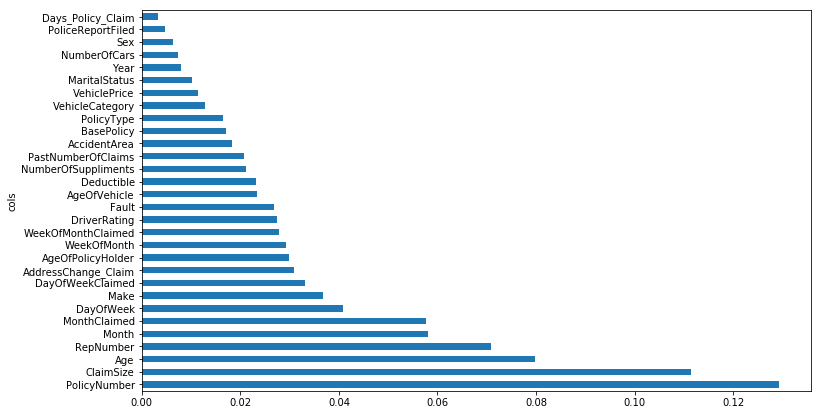

In [176]:
def plot_fi(fi): 
    return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [188]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)
m.fit(X_train.drop('PolicyNumber', axis=1), y_train)
res = [error(m.predict(X_train.drop('PolicyNumber', axis=1)), y_train),
           error(m.predict(X_valid.drop('PolicyNumber', axis=1)), y_valid),
           m.score(X_train.drop('PolicyNumber', axis=1), y_train), m.score(X_valid.drop('PolicyNumber', axis=1), y_valid)]
print(res)

[[7348   88]
 [  39  389]]
0.8596685082872928
[[3397  180]
 [  96   28]]
0.1686746987951807
[None, None, 0.9838504577822991, 0.9254255606592813]


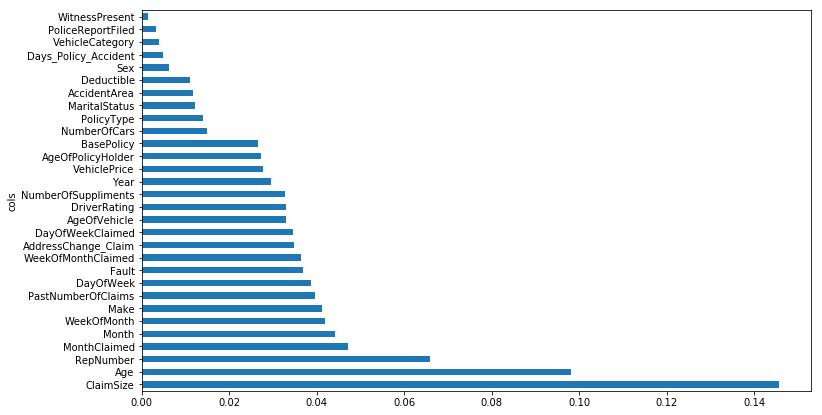

In [189]:
fi = rf_feat_importance(m, df.drop('PolicyNumber', axis=1))
plot_fi(fi[:30]);

In [160]:
m = RandomForestClassifier(n_estimators=1, n_jobs=-1, max_depth=3)
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

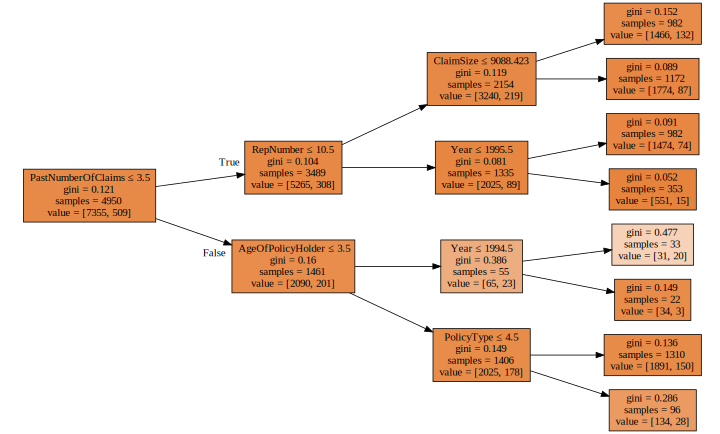

In [161]:
draw_tree(m.estimators_[0], X_valid, precision=3)

In [164]:
df_raw['PastNumberOfClaims'].cat.categories

Index([1, '2 to 4', 'more than 4', 'none'], dtype='object')

In [169]:
df['PastNumberOfClaims'].value_counts()

2    4140
4    3286
1    2675
3    1464
Name: PastNumberOfClaims, dtype: int64

In [28]:
## Price more than 69000
X=customers[customers['VehiclePrice'] =='more than 69000']['FraudFound_P'].values
Fraud=len(np.where(X==1)[0])
NotFraud=len(np.where(X==0)[0])
TotalClaims=len(X)
print('Fraud',Fraud)
print('Not Fraud',NotFraud)
print('Total Claims',TotalClaims)
## Percentage of fraud claim
print('Fraud',(Fraud/TotalClaims)*100,'%')
print('Not Fraud',(NotFraud/TotalClaims)*100,'%')

Fraud 142
Not Fraud 1463
Total Claims 1605
Fraud 8.847352024922118 %
Not Fraud 91.15264797507788 %


In [32]:
## Checking the witness present and price more than 69000
X=customers[customers['VehiclePrice'] =='more than 69000']
X=X[X['WitnessPresent']=='Yes']['FraudFound_P'].values
Fraud=len(np.where(X==1)[0])
NotFraud=len(np.where(X==0)[0])
TotalClaims=len(X)
print('Fraud',Fraud)
print('Not Fraud',NotFraud)
print('Total Claims',TotalClaims)
## Percentage of fraud claim
print('Fraud',(Fraud/TotalClaims)*100,'%')
print('Not Fraud',(NotFraud/TotalClaims)*100,'%')

Fraud 0
Not Fraud 14
Total Claims 14
Fraud 0.0 %
Not Fraud 100.0 %


In [34]:
## Checking the police report present and price more than 69000
X=customers[customers['VehiclePrice'] =='more than 69000']
X=X[X['PoliceReportFiled']=='Yes']['FraudFound_P'].values
Fraud=len(np.where(X==1)[0])
NotFraud=len(np.where(X==0)[0])
TotalClaims=len(X)
print('Fraud',Fraud)
print('Not Fraud',NotFraud)
print('Total Claims',TotalClaims)
## Percentage of fraud claim
print('Fraud',(Fraud/TotalClaims)*100,'%')
print('Not Fraud',(NotFraud/TotalClaims)*100,'%')

Fraud 2
Not Fraud 45
Total Claims 47
Fraud 4.25531914893617 %
Not Fraud 95.74468085106383 %


1605

Fraud 8.847352024922118 %
Not Fraud 91.15264797507788 %


In [8]:
customers['Make'].value_counts()

Pontiac      2899
Toyota       2317
Honda        2159
Mazda        1724
Chevrolet    1253
Accura        354
Ford          338
VW            220
Dodge          77
Saab           70
Mercury        68
Saturn         41
Nisson         22
BMW             9
Jaguar          5
Mecedes         3
Porche          3
Ferrari         2
Lexus           1
Name: Make, dtype: int64

In [ ]:
## Changing the dataset in numerical format


In [6]:
customers.shape

(11565, 34)

In [19]:
Y=customers['FraudFound_P'].values

In [22]:
del customers['FraudFound_P']

In [30]:
### Analysis the data

In [31]:
np.unique(customers['BasePolicy'])

array(['All Perils', 'Collision', 'Liability'], dtype=object)

In [27]:
np.unique(customers['AccidentArea'])

array(['Rural', 'Urban'], dtype=object)

In [28]:
np.unique(customers['MaritalStatus'])

array(['Divorced', 'Married', 'Single', 'Widow'], dtype=object)

In [29]:
np.unique(customers['Fault'])

array(['Policy Holder', 'Third Party'], dtype=object)

In [33]:
np.unique(customers['PolicyType'])

array(['Sedan - All Perils', 'Sedan - Collision', 'Sedan - Liability',
       'Sport - All Perils', 'Sport - Collision', 'Sport - Liability',
       'Utility - All Perils', 'Utility - Collision',
       'Utility - Liability'], dtype=object)

In [34]:
np.unique(customers['VehicleCategory'])

array(['Sedan', 'Sport', 'Utility'], dtype=object)

In [37]:
np.unique(customers['VehiclePrice'])

array(['20000 to 29000', '30000 to 39000', '40000 to 59000',
       '60000 to 69000', 'less than 20000', 'more than 69000'],
      dtype=object)

In [43]:
np.unique(customers['RepNumber'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [44]:
np.unique(customers['Deductible'])

array([300, 400, 500, 700])

In [45]:
np.unique(customers['DriverRating'])

array([ 1.,  2.,  3.,  4., nan, nan, nan, nan, nan, nan])

In [46]:
np.unique(customers['Days_Policy_Accident'])

array(['1 to 7', '15 to 30', '8 to 15', 'more than 30', 'none'],
      dtype=object)

In [48]:
np.unique(customers['Days_Policy_Claim'])

array(['15 to 30', '8 to 15', 'more than 30', 'none'], dtype=object)

In [50]:
customers['PastNumberOfClaims'].value_counts()

2 to 4         4140
none           3286
1              2675
more than 4    1464
Name: PastNumberOfClaims, dtype: int64

In [51]:
customers['AgeOfVehicle'].value_counts()

7 years        4388
more than 7    2993
6 years        2581
5 years         990
new             285
4 years         176
3 years         100
2 years          52
Name: AgeOfVehicle, dtype: int64

In [52]:
customers['AgeOfPolicyHolder'].value_counts()

31 to 35    4199
36 to 40    3008
41 to 50    2122
51 to 65    1070
26 to 30     445
over 65      388
16 to 17     247
21 to 25      73
18 to 20      13
Name: AgeOfPolicyHolder, dtype: int64

In [54]:
customers['PoliceReportFiled'].value_counts()

No     11235
Yes      330
Name: PoliceReportFiled, dtype: int64

In [55]:
customers['WitnessPresent'].value_counts()

No     11497
Yes       68
Name: WitnessPresent, dtype: int64

In [56]:
customers['AgentType'].value_counts()

External    11394
Internal      171
Name: AgentType, dtype: int64

In [57]:
customers['NumberOfSuppliments'].value_counts()

none           5330
more than 5    2875
1 to 2         1846
3 to 5         1514
Name: NumberOfSuppliments, dtype: int64

In [58]:
customers['AddressChange_Claim'].value_counts()

no change         10715
4 to 8 years        496
2 to 3 years        222
1 year              128
under 6 months        4
Name: AddressChange_Claim, dtype: int64

In [59]:
customers['NumberOfCars'].value_counts()

1 vehicle      10698
2 vehicles       559
3 to 4           288
5 to 8            19
more than 8        1
Name: NumberOfCars, dtype: int64

In [60]:
customers['Year'].value_counts()

1994    4596
1995    3923
1996    3046
Name: Year, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)